In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import glob
import plotly.graph_objects as go
import numpy as np

from plotly.graph_objs import *
import pandas as pd
import plotly.express as px

In [2]:
def show_cluster(embedding_name):
    xyz = np.load(embedding_name,allow_pickle=True)
    print(embedding_name,xyz.shape)
    x, y, z = xyz[:,0], xyz[:,1], xyz[:,2]
    fig = go.Figure(data=[go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=1,
            opacity=0.1
        )
    )])
    # tight layout
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.write_html(embedding_name+'.html', auto_open=True)


In [4]:
'''
UMAP representation of the morphology
and coloring based on a given feature
'''
import plotly.graph_objects as go
from plotly.graph_objs import *
import pandas as pd
import plotly.express as px
import os

id_list = [13,53,17,52,40,38,45,39,57,56,51,46,41,54]
usecols = (3, 4, 5, 6, 7, 8)
features = ['area','perimeter','eccentricity','circularity','mean_intensity','tot_intensity']

for idx in id_list[:1]:
    idx = 52
    morphology_filename = '/home/garner1/wsi-data/npy/'+str(idx)+'.txt.woInf.gz'
    embedding_filename = '/home/garner1/wsi-data/npy/id'+str(idx)+'_clusterable_embedding.morphology.npy'
    
    morphology = np.loadtxt(morphology_filename, delimiter="\t", skiprows=True, usecols=usecols)
    embedding = np.load(embedding_filename, allow_pickle=True)

    df_embedding = pd.DataFrame(data=embedding, columns=['x','y','z'])
    df_morphology = pd.DataFrame(data=morphology, columns=['area','perimeter',
                                                          'eccentricity','circularity',
                                                           'mean_intensity','tot_intensity'])
    for feature in features:
        df_embedding['color'] = pd.qcut(df_morphology[feature], 10, labels=False)
        fig = px.scatter_3d(df_embedding.sample(n=100000,axis=0), x="x", y="y", z="z", color="color", hover_name="color")
        fig.update_traces(marker=dict(size=1,opacity=0.5),selector=dict(mode='markers'))
        fig.update_layout(title=os.path.basename(embedding_filename)+' '+feature,
                            font=dict(
                            family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f"
                                )
                         )
        fig.write_html(embedding_filename+'.'+feature+'.100K_subsampling.html', auto_open=True)

In [37]:
'''
UMAP representation of the morphology
'''
import plotly.graph_objects as go
from plotly.graph_objs import *
import pandas as pd
import plotly.express as px
import os

id_list = [13,53,17,52,40,38,45,39,57,56,51,46,41,54]
usecols = (1,2,3, 4, 5, 6, 7, 8)

for idx in id_list[:1]:
    morphology_filename = '/home/garner1/wsi-data/npy/'+str(idx)+'.txt.woInf.gz'
    embedding_filename = '/home/garner1/wsi-data/npy/id'+str(idx)+'_clusterable_embedding.morphology.npy'
    
    morphology = np.loadtxt(morphology_filename, delimiter="\t", skiprows=True, usecols=usecols)
    embedding = np.load(embedding_filename, allow_pickle=True)

    df_embedding = pd.DataFrame(data=embedding, columns=['x','y','z'])
    df_morphology = pd.DataFrame(data=morphology, columns=['cx','cy','area','perimeter',
                                                          'eccentricity','circularity',
                                                           'mean_intensity','tot_intensity'])
    df = pd.concat([df_morphology, df_embedding], axis=1)
    fig = px.scatter_3d(df.sample(n=10000,axis=0), x="x", y="y", z="z")
    fig.update_traces(marker=dict(size=1,opacity=0.5),selector=dict(mode='markers'))
    fig.update_layout(title=os.path.basename(embedding_filename),
                            font=dict(
                            family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f"
                                )
                         )
    fig.write_html(embedding_filename+'.10K_subsampling.html', auto_open=True)

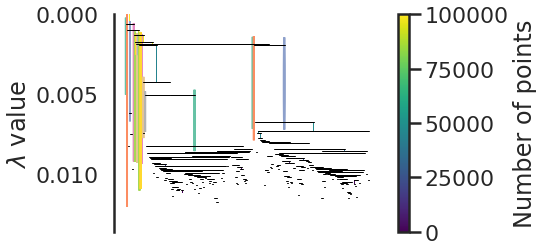

In [41]:
'''
Density based clustering
'''
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

import hdbscan

XX = df.sample(n=100000,axis=0)
pos = XX[['cx','cy']]

min_cluster_size = 100 #parameters
min_samples = 10       #parameters

clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, gen_min_span_tree=True)
clusterer.fit(pos) #cluster positions
clusterer.condensed_tree_.plot(select_clusters=True, 
                               selection_palette=sns.color_palette("Set2",len(clusterer.labels_)))

from plotly.graph_objs import *
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

XX['cluster'] = clusterer.labels_    #add cluster id to dataframe
XX['cluster'] = XX['cluster'].apply(str)   #make clustet id a string

#df['alpha'] = clusterer.probabilities_
#df['alpha'] = df['alpha'].apply(str)

df_filtered = XX[XX.cluster != str(-1)]  # consider only clustered points

fig = px.scatter_3d(df_filtered, x="x", y="y", z="z", color="cluster", hover_name="cluster", 
                        color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_traces(marker=dict(size=1,opacity=0.75),selector=dict(mode='markers'))
fig.update_layout(title=os.path.basename(embedding_filename)+' min_cluster='+str(min_cluster_size)+' min_samples='+str(min_samples),
                  font=dict(family="Courier New, monospace",size=18,color="#7f7f7f")
                 )
    

fig.write_html('test.html', auto_open=True)

In [ ]:
'''
Densidy based clustering of the spatial density
'''
idx = 13
morphology_filename = '/home/garner1/wsi-data/npy/'+str(idx)+'.txt.woInf.gz'
embedding_filename = '/home/garner1/wsi-data/npy/id'+str(idx)+'_clusterable_embedding.morphology.npy'
    
pos = np.loadtxt(morphology_filename, delimiter="\t", skiprows=True, usecols=(1,2))
XX = pd.DataFrame(data=pos, columns=['x','y']).sample(n=100000,axis=0)
print(XX.shape)
    
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

import hdbscan

min_cluster_size = 100
min_samples = 100
clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, gen_min_span_tree=True)
clusterer.fit(XX)

clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette("Set2",len(clusterer.labels_)))

from plotly.graph_objs import *
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

XX['cluster'] = clusterer.labels_
XX['cluster'] = XX['cluster'].apply(str)

#df['alpha'] = clusterer.probabilities_
#df['alpha'] = df['alpha'].apply(str)

df_filtered = XX[XX.cluster != str(-1)]

fig = px.scatter_3d(df_filtered, x="x", y="y", z="z", color="cluster", hover_name="cluster", 
                        color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_traces(marker=dict(size=1,opacity=0.75),selector=dict(mode='markers'))
fig.update_layout(title=os.path.basename(embedding_filename)+' min_cluster='+str(min_cluster_size)+' min_samples='+str(min_samples),
                  font=dict(family="Courier New, monospace",size=18,color="#7f7f7f")
                 )
    

fig.write_html('test.html', auto_open=True)


In [3]:
from plotly.graph_objs import *
import pandas as pd
import plotly.express as px

for f in glob.glob(r'../npy/clusterable_embedding.merge.primary.ilastik.npy'):
    print(f)
    data = np.load(f,allow_pickle=True)
    df = pd.DataFrame(data=data,columns=['x','y','z','label'])
    df['label'] = df['label'].apply(round).apply(str)

    fig = px.scatter_3d(df, x="x", y="y", z="z", color="label", hover_name="label", 
                        color_discrete_sequence=px.colors.qualitative.Set2)
    fig.update_traces(marker=dict(size=1,opacity=0.75),selector=dict(mode='markers'))
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                      legend=go.layout.Legend(
                          x=0,
                          y=1,
                          traceorder='normal',
                          font=dict(family='sans-serif',size=20,color='black'),
                          itemsizing='constant' #to show larget legend markers
                      ))

    fig.write_html(f+'.html', auto_open=True)

../npy/clusterable_embedding.merge.primary.ilastik.npy


In [9]:
from plotly.graph_objs import *
import pandas as pd
import plotly.express as px

for f in glob.glob(r'../npy/clusterable_embedding.merge.38-52-53-57-380.ilastik+HE.-intensity.-xy.npy'):
    print(f)
    data = np.load(f,allow_pickle=True)
    df = pd.DataFrame(data=data,columns=['x','y','z','label'])
    df['label'] = df['label'].apply(round).apply(str)

    fig = px.scatter_3d(df, x="x", y="y", z="z", color="label", hover_name="label", 
                        color_discrete_sequence=px.colors.qualitative.Set2)
    fig.update_traces(marker=dict(size=1,opacity=0.75),selector=dict(mode='markers'))
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.write_html(f+'.html', auto_open=True)

../npy/clusterable_embedding.merge.38-52-53-57-380.ilastik+HE.-intensity.-xy.npy


In [3]:
from plotly.graph_objs import *
import pandas as pd
import plotly.express as px

for f in glob.glob(r'../npy/clusterable_embedding.merge.38-52-53-57.HE.*.npy'):
    print(f)
    data = np.load(f,allow_pickle=True)
    df = pd.DataFrame(data=data,columns=['x','y','z','label'])
    df['label'] = df['label'].apply(round).apply(str)

    fig = px.scatter_3d(df, x="x", y="y", z="z", color="label", hover_name="label", 
                        color_discrete_map={"38": "red","52": "green","53": "blue","57": "goldenrod"})
#                    color_discrete_sequence=px.colors.qualitative.Set2)
    fig.update_traces(marker=dict(size=1,opacity=0.75),selector=dict(mode='markers'))
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.write_html(f+'.html', auto_open=True)

../npy/clusterable_embedding.merge.38-52-53-57.HE.-intensity.+xy.npy
../npy/clusterable_embedding.merge.38-52-53-57.HE.-intensity.-xy.npy
../npy/clusterable_embedding.merge.38-52-53-57.HE.+intensity.+xy.npy
../npy/clusterable_embedding.merge.38-52-53-57.HE.+intensity.-xy.npy


In [5]:
from plotly.graph_objs import *
import pandas as pd
import plotly.express as px

for f in glob.glob(r'../npy/clusterable_embedding.merge.38-52-53-57.ilastik+qpHE.?intensity.?xy.npy'):
    print(f)
    data = np.load(f,allow_pickle=True)
    df = pd.DataFrame(data=data,columns=['x','y','z','label'])
    df['label'] = df['label'].apply(round).apply(str)

    fig = px.scatter_3d(df, x="x", y="y", z="z", color="label", hover_name="label", 
                        color_discrete_map={"38": "red","52": "green","53": "blue","57": "goldenrod"})
#                    color_discrete_sequence=px.colors.qualitative.Set2)
    fig.update_traces(marker=dict(size=2,opacity=0.75),selector=dict(mode='markers'))
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.write_html(f+'.html', auto_open=True)

../npy/clusterable_embedding.merge.38-52-53-57.ilastik+qpHE.+intensity.+xy.npy
../npy/clusterable_embedding.merge.38-52-53-57.ilastik+qpHE.-intensity.-xy.npy
../npy/clusterable_embedding.merge.38-52-53-57.ilastik+qpHE.+intensity.-xy.npy
../npy/clusterable_embedding.merge.38-52-53-57.ilastik+qpHE.-intensity.+xy.npy


Rotate the pointcloud

In [ ]:
f='../npy/clusterable_embedding.merge.38-52-53-57.ilastik.-intensity.+xy.npy'

embedding = np.load(f,allow_pickle=True)
df = pd.DataFrame(data=embedding,columns=['x','y','z','label'])
df['label'] = df['label'].apply(round).apply(str)

colorsIdx = {"38": "red","52": "green","53": "blue","57": "goldenrod"}
cols = df['label'].map(colorsIdx)

trace=[go.Scatter3d(x=df['x'], y=df['y'], z=df['z'], mode='markers',marker=dict(size=1,opacity=0.5,color=cols))]

x_eye = -1.25
y_eye = 2
z_eye = 0.5

layout = go.Layout(
         title='Animation Test',
         width=600,
         height=600,
         scene=dict(camera=dict(eye=dict(x=x_eye, y=y_eye, z=z_eye))),
         updatemenus=[dict(type='buttons',
                  showactive=False,
                  y=1,
                  x=0.8,
                  xanchor='left',
                  yanchor='bottom',
                  pad=dict(t=45, r=10),
                  buttons=[dict(label='Play',
                                 method='animate',
                                 args=[None, dict(frame=dict(duration=2, redraw=False), 
                                                             transition=dict(duration=0),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )]
                                            )
                                      ]
                              )
                        ]
)


def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

frames=[]
for t in np.arange(0, 6.26, 0.05):
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
    frames.append(dict(layout=dict(scene=dict(camera=dict(eye=dict(x=xe, y=ye, z=ze))))))

fig = go.Figure(data=trace, layout=layout, frames=frames)

fig.write_html(f+'.html', auto_open=True)

Plot samples with a discrete color sequence (different plots will have different color order)

In [ ]:
from plotly.graph_objs import *
import pandas as pd
import plotly.express as px

for f in glob.glob(r'../npy/clusterable_embedding.merge.38-52-53-57.ilastik.*.npy'):
    print(f)
    data = np.load(f,allow_pickle=True)
    df = pd.DataFrame(data=data,columns=['x','y','z','label'])
    df['label'] = df['label'].apply(round).apply(str)

    fig = px.scatter_3d(df, x="x", y="y", z="z", color="label", hover_name="label", 
                        color_discrete_sequence=px.colors.qualitative.Set2)
    fig.update_traces(marker=dict(size=1,opacity=0.75),selector=dict(mode='markers'))
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.write_html(f+'.html', auto_open=True)

We can try to cluster the points in the multisample cloud.

In [ ]:
from plotly.graph_objs import *
import pandas as pd
import plotly.express as px
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
import numpy as np

X = data[:,:3]

#clustering = OPTICS(min_samples=50).fit(X)
clustering = DBSCAN(eps=0.6, min_samples=50).fit(X)

df['label_optic'] = clustering.labels_
df['label_optic'] = df['label_optic'].apply(str)

fig = px.scatter_3d(df, x="x", y="y", z="z", color="label_optic", hover_name="label", 
                    color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_traces(marker=dict(size=2,opacity=0.25),selector=dict(mode='markers'))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.write_html('merge-samples.html', auto_open=True)

See how the point cloud changes with sampling size

In [ ]:
from numpy.random import normal as normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib

In [ ]:
####################################################################################################                                                                                                               
# load logvec from different samples                                                                                                                                                                               
###################################################################################################                                                                                                                
import numpy as np
import glob
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.cluster import OPTICS
import pandas as pd
import plotly.express as px

xs = []
ys = []
zs = []

lista = [ f for f in glob.glob(r'../npy/52.txt.r1.s*.logvec.npy') ]

In [ ]:
'''Use this to see individual random clusters'''
for f in lista:
    X = np.load(f,allow_pickle=True) # create the array of vectorized covd data                                                                                                                                              
    clusterable_embedding = umap.UMAP(min_dist=0.0,n_components=3,random_state=42).fit_transform(X) # this is used to identify clusters                                                                                

    xs.append(list(clusterable_embedding[:,0]))
    ys.append(list(clusterable_embedding[:,1]))
    zs.append(list(clusterable_embedding[:,2]))

In [ ]:
'''Use this to see random sampling expansion'''
for idx in range(2,len(lista)):
    print(idx)
    logvec_list = [ np.load(f,allow_pickle=True) for f in lista[:idx] ]
    X = np.vstack(logvec_list) # create the array of vectorized covd data                                                                                                                                              
    clusterable_embedding = umap.UMAP(min_dist=0.0,n_components=3,random_state=42).fit_transform(X) # this is used to identify clusters                                                                                

    xs.append(list(clusterable_embedding[:,0]))
    ys.append(list(clusterable_embedding[:,1]))
    zs.append(list(clusterable_embedding[:,2]))

In [ ]:
nfr = len(xs) # Number of frames
fps = 1 # Frame per sec

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], ".", markersize=1)
def update(ifrm, xa, ya, za):
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=1000)

fn = 'plot_3d_scatter_pooling_samples'
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)
ani.save(fn+'.gif',writer='imagemagick',fps=fps)

plt.rcParams['animation.html'] = 'html5'
ani